# CITS4403 Project
Dylan Bell 21711951 <br> </br>
Ryan Hodgson 21969062 <br> </br>
Harry Brooker 21983613 <br> </br>
James Tambakis 21962012 <br> </br>

# Error And Attack Tolerance Of Complex Networks
*Reka Albert, Hawoong Jeong & Albert-Laszlo Barabasi*

Import all required libraries :

In [64]:
import matplotlib.pyplot as plt
import networkx as nx
import numpy as np
import random

Initalise and set seed to ensure results can be replicated :

In [65]:
seed = 123
random.seed(seed)
np.random.seed(seed)

## 1. Introduction

### 1.1 Overview

Complex networks are networks which consist of many nodes connected to each other. The topology of the network depends on how the nodes are connected, and can either be an exponential network or a scale-free network. The Internet and social networks, such as Facebook, are examples of scale-free networks, where a node represents a page on the Internet or a person on Facebook.

Due to the connectedness of a network, the failure or removal of a node may cause the connectivity or diameter of the network to change. In this paper, the error and attack tolerance of both scale-free networks and exponential networks are explored. It is shown that scale-free networks are very robust in the face of random failures, however they are much more prone to planned attacks on highly connected nodes. The opposite holds true for exponential networks, which are vulnerable to random failures, but not greatly affected by targeted attacks.

We have run a set of experiments, some of which come from the paper, and others we created, to further explore the error and attack tolerance of exponential networks and scale-free networks. The experiments involve the removal of either random or specific nodes and viewing the resulting effects on the network. Each experiment is simulated in Python using the NetworkX library to construct and modify the graphs. We have included an experiment that uses a Facebook dataset as an example of a complex network, which was obtained from the SNAP group. 

**Definitions:**
> Random failure – a random node in a network no longer being a participant in the network  
> Attack – the selection and removal of a few nodes that play a vital role in maintaining the networks connectivity  
> Robustness – the ability of nodes to communicate to be unaffected by high failure rates  
> Tolerance – relates to the networks robustness  
> Diameter – average length of the shortest paths between any two nodes in a network  
> Exponential network – network topology where each node has approximately the same number of links  
> Scale-free network – network topology where the majority of nodes only have a few links, but a few nodes have a large number of links  



## 2 Erdos-Renyi Graph

### 2.1 Overview

The Erdos-Renyi (ER) graph G(n,p) is made up of n nodes, with each pair of nodes being connected with probability p. The ER model is useful for studying random graphs due to the independent edges making analysis easy. However, the assumption that edges are independent is almost always innaccurate in the real world, making the model inappriopriate for modelling real life systems. 

In this report we will discuss how tolerant the ER model when faced with failures and attacks, and this tolerance will be compared to a number of different models.

### 2.2 Implementation

The below function creates an ER graph using the NetworkX ER_graph function 

In [66]:
def create_ER_graph(N, p, seed):
    '''
        N : Number of nodes
        P : Probability that each node is connected
        Seed : For reproduction of results
    
    '''
    return nx.erdos_renyi_graph(N, p, seed)

### 2.3 Visualisation

Create an Erdos-Renyi Graph with N = 20 and P = 0.15 and display the resulting graph

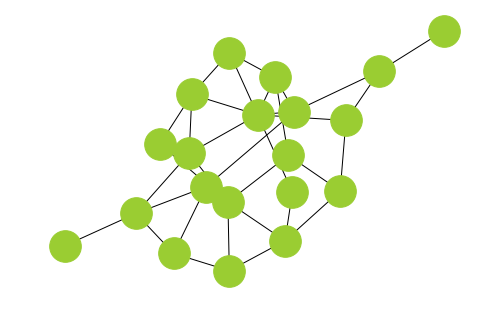

In [67]:
N = 20
P = 0.15
ER_graph = create_ER_graph(N, P, seed)

nx.draw(ER_graph, pos=nx.spring_layout(ER_graph), with_labels=False, font_size=15,
        node_color='yellowgreen', node_size=1000)


## 3 Scale-Free Graph

### 3.1 Overview

A scale free graph is a graph with a degree definition that follows a power law. This means that there will likely be a large number of nodes with a small number of connections, and the **probability** of a node having a **large** number of connections is inversely proportional to the number of connections.

The Barabasi-Albert (BA) model *G(n,m)* is used to generate scale free networks through the implementation of preferential attachment. A BA graph will have n nodes, with each node having m edges. The graph initially has a small number of nodes, and new nodes are added over time. The probably of a new node being connected to an existing node is proportional to the number of connections the existing node already has. This essentially means that the nodes with the most connections are more likely to get even more connections, and causes a 'rich getting richer' effect.

This model is more relevant in the real world as humans almost always exhibit preferential attachment. If we take the example of social media accounts, there will be millions of accounts with a small number of followers, and a small number of celebrities with millions of followers. A new account will be more likely to follow the celebrities, and thus we have an example of preferential attachment.

### 3.2 Implementation

The below function creates a Barabasi-Albert Graph using the Networkx barabasi_albert_graph function

In [68]:
def create_SF_graph(N, M, seed):
    '''
        N : Number of nodes
        M : Number of edges to attach from a new node to an existing node
        seed : For reproduction of results
    '''
    return nx.barabasi_albert_graph(N, M, seed)

### 3.3 Visualisation

Create a Scale Free Graph with N = 20 and M = 3

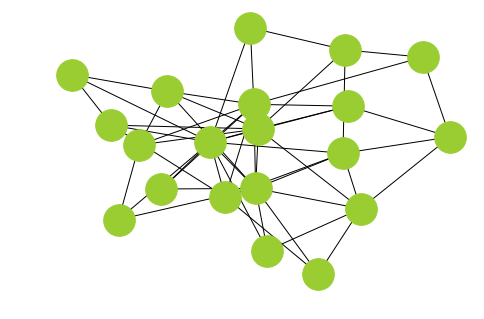

In [69]:
N = 20
M = 3
SF_graph = create_SF_graph(N, M, seed)

nx.draw(SF_graph, pos=nx.spring_layout(SF_graph), with_labels=False, font_size=15,
        node_color='yellowgreen', node_size=1000)

## 4. Experiment 1

## 4.1 Overview

In this experiment, we will consider the effect that an attack or failure has on two different types of networks, an exponential network and a scale-free network. On both the ER graph and the SF graph, random nodes are removed to simulate a graph failure, and the most connected nodes are removed to simulate an attack on the network. To measure the effect these changes have on the networks the diameter of the graphs, d, are plotted against the fraction, f, of nodes removed.

The ER graph is a model of an exponential network, where nodes are of similar degree and no few nodes are responsible for keeping the network connected. As such, we expect the effect that a random failure has on an ER graph to be similar to the effect an attack has on the network. On the other hand, because the scale-free graph has a few nodes that connect a large majority of the rest of the nodes, we expect a random failure to not have much of an impact on the network, but a targeted attack to cause a significant increase to the diameter of the graph.

The results in the paper show this expected behavior. The ER graphs diameter increases consistently across both a failure and attack as f increases, while the effect that a failure and attack have on a SF network diverge considerably. As f increases, an attack on the scale-free network causes a drastic increase to the diameter of the network, while random failure does not cause much of an increase to the diameter of the network.


## 4.2 Common Functionality

Define a range which represents the fraction of nodes to be removed at each iteration

In [70]:
remove_range = list(np.arange(0.005, 0.055, 0.005))

The below function determines the diameter (as defined by this paper) of a given graph - e.g. finds the average shortest path in the graph

In [71]:
def get_diameter(G):
    '''
        G : Graph
    '''
    return nx.average_shortest_path_length(G)

## 4.3 Failure

The following function will delete a random fraction/portion of nodes from the graph. These nodes are retrieved from a list which is randomly sorted. A local copy of the graph is made and returned so as to ensure the graph is not mutated.

In [72]:
def delete_random_nodes(G, f, L):
    '''
        G : Graph
        f : The fraction of nodes to be removed
        L : List of random nodes
    '''
    G_local = G.copy()
    
    # calculate the amount of nodes to be removed (as opposed to the 
    # fraction of nodes to be removed).
    N = len(G_local.nodes)
    delete_amount = int(N * f)
    
    count = 1

    # for each node in L - remove a node from the local graph until 
    # you reach the relevant threshold.
    for node in L:
        G_local.remove_node(node)

        if count >= delete_amount:
            break
        else:
            count = count + 1
    
    return G_local

The following function is the driver for the "generate failure" functionality.

In [73]:
def generate_failure(G, remove_range):
    '''
        G: graph
        remove_range : a list of fractions which denote the 
            number of nodes to be removed at each iteration
    '''
    diameters = []

    for f in remove_range:
        
        # randomly shuffle the nodes to simulate a 
        #"random" attack
        G_random_nodes = list(G.nodes())
        random.shuffle(G_random_nodes)

        # retrieve the modifed graph where the relevant random 
        # nodes have been removed
        deleted_graph = delete_random_nodes(G, f, G_random_nodes)
        
        recalculated_diameter = get_diameter(deleted_graph)
        
        # add this diameter to the returned list
        diameters.append(recalculated_diameter)

    return diameters

## 4.4 Attack

The following function will delete the most connected nodes within a graph. These highly connected nodes are deleted in order and are retrieved from a list passed into the function. Again, a local copy of the graph is made and returned so as to ensure the graph is not mutated.

In [74]:
def delete_connected_nodes(G, f, L):  
    '''
        G : Graph
        f : The fraction of nodes to be removed
        L : List of highly connected nodes
    '''
    G_local = G.copy()

    N = len(G_local.nodes)
    delete_amount = int(N * f)
    count = 1

    # each element in L is a tuple of (node, links)
    for (node, _) in L:
        G_local.remove_node(node)
            
        # keep removing nodes until we reach the amount 
        # specified by 'f'
        if count >= delete_amount:
            break
        else:
            count = count + 1

    return G_local

The below function will return a list of the highest connected nodes within a graph.

In [82]:
def get_most_connected_nodes(G):
    '''
        G : Graph 
    '''
    
    # G.degree returns (node, degree)
    degrees = list(G.degree)
    
    # order the nodes in descending order based on degree
    degrees.sort(key=lambda tup: tup[1], reverse=True)
    
    return degrees

The following function is the driver for the "generate attack" functionality.

In [83]:
def generate_attack(G, remove_range):
    '''
        G : Graph
        remove_range : List of fractions which highlight the 
            portion of nodes to be removed at each iteration
    '''
    
    # retrieve the most connected nodes of the relevant graph
    connected_nodes_list = get_most_connected_nodes(G) 
    
    diameters = []

    for f in remove_range:
        
        # delete the relevant amount of nodes
        modified_graph = delete_connected_nodes(G, f, connected_nodes_list)
        
        recalculated_diameter = get_diameter(modified_graph)
        diameters.append(recalculated_diameter)

    return diameters

## 4.5 Run Experiment

We should first re-define the ER and SF graph as seen below.

In [84]:
N = 300
M = 7
P = 0.1

In [85]:
ER_graph = create_ER_graph(N, P, seed)
SF_graph = create_SF_graph(N, M, seed)

Define a simple function which will plot the relevant data for us.

In [86]:
def generate_experiment_1_graph(x, graph_data):    
    
    '''
        x : X-axis values
        graph_data : List of lists which contains all the
            data from the above experiments
    '''
    
    plt.plot(x, graph_data[0], marker='^', label="ER Failure", color="b")
    plt.plot(x, graph_data[1], marker='D', label="ER Attack", color="r")
    plt.plot(x, graph_data[2], marker='s', label="SF Failure",color="b")
    plt.plot(x, graph_data[3], marker='o', label="SF Attack",color="r")   
    
    plt.xlabel('Fraction f of nodes removed')
    plt.ylabel('Diameter d')
    plt.legend(loc='upper right')
    plt.title("Failure & Attack On SF & ER Graph")
    plt.show()

Remove random nodes from an ER Graph - simulating a graph failure.

In [87]:
ER_failure_diameters = generate_failure(ER_graph, remove_range)

Remove the most connected nodes from an ER Graph - simulating an attack on a graph

In [88]:
ER_attack_diameters = generate_attack(ER_graph, remove_range)

Remove random nodes from an SF Graph - simulating a graph failure.

In [89]:
SF_failure_diameters = generate_failure(SF_graph, remove_range)

Remove the most connected nodes from an SF Graph - simulating an attack on a graph

In [90]:
SF_attack_diameters = generate_attack(SF_graph, remove_range)

Graph the results from the above experiments.

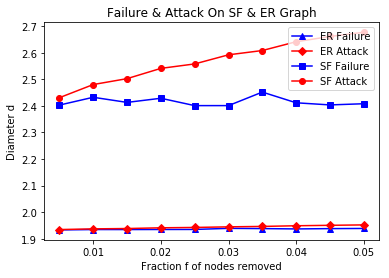

In [91]:
graph_data = [ER_failure_diameters, ER_attack_diameters, 
              SF_failure_diameters, SF_attack_diameters]
generate_experiment_1_graph(remove_range, graph_data)

## 4.6 Discussion Of Generated Results

The shape of the traces directly supports the results published in the Barabasi paper. The ER failure and attack traces are made up of almost the same data and have the same slope, whereas the SF failure trace has a negligible slope and the SF Attack trace has a clear positive slope.

The difference in our results is the size of the diameter. The results in the paper show that the diameter of the ER graph starts at around 7, while the SF graph starts at about 5.5.

These results are different to ours due to the number of nodes and links in our graphs. The graphs used in the paper have 10000 nodes and 20000 links. In the papers' BA graph, there is a smaller number of edges per node (2 whereas we used 7) which means that the graph will be less connected and therefore we expect that the average shortest path will be larger. In our ER graph, it is expected that there are 30 edges per node, which is much larger than tha paper's 2 edges/node. Because of this large difference, our calculated diamaters for the ER graphs should be *a lot* smaller than the paper's. This turns out to be true, and explains why our results look slightly different to those graphed in the paper.

To achieve results similar to those found in the paper, we would need to create the graphs with 10000 nodes and 2 edges per node. We attempted this but our computational resources were limited and so we couldn't run the program in a reasonable amount of time. When we tried to keep a similar level of clustering with a smaller number of nodes, our graphs were not connected and so we could not accurately find the diameters. We found our parameters to be the most suitable for our implementation, as the code can be executed quickly with our limited resources and the results produced are ultimately consistent with those found in the paper.


## 5. Experiment 1 - Facebook

## 5.1 Overview

The paper goes on to run the first experiment with different datasets, one being a topological map of the internet with 6,209 nodes and 12,200 edges. The other dataset is a sample of the wolrd wide web containing 325,729 nodes and 1,498,353 edges. From our attempts at the first experiment it was clear that these datasets would be far too large for us to implement and so we had to find a smaller dataset that has similar traits to a topological map of the internet.

Stanford university have published a dataset consisting of links between accounts on Facebook. This dataset has 4,039 nodes and 88,234 edges which is a significant amount, but small enough so that our program could efficiently run and observe the graph's tolerance against random failures and targeted attacks. It was decided to be suitable as it is a real dataset, and the preferential attachment embedded within the dataset is somewhat representative of the attachment seen in the world wide web. A prediction is that the hubs present in the world wide web dataset will be larger that those found in the facebook dataset, and so we are expecting a significant variance in our results.


## 5.2 Common Functionality

The following two functions have been taken from 'Think Complexity' by Allen B. Downey. This "sampling" method is used instead since an extensive search of every single path will take too long. The below two functions enable us to search the graph space quickly and determine a rough value for the path length.

In [92]:
def sample_path_lengths(G, trials=1000):
    '''
        G : Graph
        trails : Number of trials this sampling is 
            going accumulate, default 1000
    '''
    nodes = list(G)

    pairs = np.random.choice(nodes, (trials, 2)) 

    lengths = [nx.shortest_path_length(G, *pair) 
               for pair in pairs]
    
    return lengths

In [93]:
def estimate_path_length(G, trials=1000):
    '''
        G : Graph
        trails : Number of trials this sampling is going 
            accumulate, default 1000
    '''
    return np.mean(sample_path_lengths(G, trials))

The following function is required due to the properties of the Facebook dataset. Removing a small number of nodes appears to split the Facebook data into a number of clusters. The following function returns the maximum diameter out of these clusters.

In [94]:
def max_subgraph_diameter(G):
    '''
        G :Graph
    '''
    
    # get a list of all the subgraphs
    subgraphs = nx.connected_component_subgraphs(G)
    
    subgraph_diameters = []
    
    for subgraph in subgraphs:
        
        # estimate the length of the relevant cluster
        L = estimate_path_length(subgraph)
        
        # don't include those clusters whose length is 0
        if L != 0.0:
            subgraph_diameters.append(L)

    L = max(subgraph_diameters)
    
    return L

## 5.3 Failure

A similar function to the one defined in Section 4. The difference lies in how the diameter is retrieved. Removing a small number of nodes seems to change the properties of the graph from connected to not connected. As a result, and to accomodate this disconnection, the largest clusters' diameter is recorded as an alternative.

In [95]:
def facebook_generate_failure(G, range):
    '''
        G : Graph
        range : fraction which represents the portion of nodes to be removed
    '''
    
    diameters = []

    for f in range:
        
        # randomise the list of nodes within the graph
        G_random_nodes = list(G.nodes())
        random.shuffle(G_random_nodes)

        G_modified = delete_random_nodes(G, f, G_random_nodes)
        
        # measure the diameter of the largest cluster
        diameter = max_subgraph_diameter(G_modified)
        diameters.append(diameter)
    
    return diameters

## 5.4 Attack

Again, this function is very similar to it's counterpart in Section 4 - the only difference is the way in which 'diameter' is measured, as explained above.

In [102]:
def facebook_generate_attack(G, range):
    '''
        G : Graph
        range : fraction which represents the portion of nodes to be removed
    '''
    diameters = []

    for f in range:
        G_connected_nodes = get_most_connected_nodes(G)
        G_modified = delete_connected_nodes(G, f, G_connected_nodes)
        diameter = max_subgraph_diameter(G_modified)
        diameters.append(diameter)

    return diameters

## 5.5 Run Experiment

The following function will be used to plot the values derived in this experiment.

In [103]:
def generate_facebook_graph(attack, failure, x):
    '''
        attack : values generated from attack experiment
        failure : values generated from failure experiment
        x : x values
    '''
    plt.plot(x, failure, marker='s', label="Facebook Failure", color="b")
    plt.plot(x, attack, marker='o', label="Facebook Attack", color="r")
    plt.xlabel('Fraction of nodes removed')
    plt.ylabel('Diameter d Of Largest Subgraph')
    plt.legend(loc='upper right')
    plt.title("Failure & Attack On Facebook Graph")
    plt.show()

The following function is also taken from 'Think Complexity' by Allen B. Downey. The below code just allows us to read in the Facebook dataset, provided by SNAP, and convert it into a networkX graph.

In [104]:
def read_graph(filename):
    '''
        filname : string representation of the file to read in
    '''
    G = nx.Graph()
    array = np.loadtxt(filename, dtype=int)
    G.add_edges_from(array)
    return G

Read in the graph.

In [105]:
facebook = read_graph('facebook_combined.txt.gz')
remove_range = list(np.arange(0.00, 0.055, 0.005))

Run the attack and failure experiment on the Facebook data and store the results.

In [106]:
facebook_attack_diameters = facebook_generate_attack(facebook, remove_range)

In [107]:
facebook_failure_diameters = facebook_generate_failure(facebook, remove_range)

Graph the results.

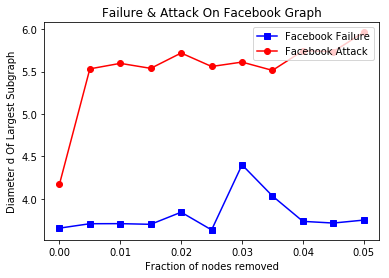

In [108]:
generate_facebook_graph(facebook_attack_diameters, 
                        facebook_failure_diameters, remove_range)

## 5.6 Discussion Of Generated Results

The most noticeable point in our results is the large jump that the attack trace makes after only 0.5% of the nodes have been removed. This means that in the facebook dataset, there is at least one large central node that lowers the shortest path between multiple pairs of nodes. Removing this causes the average diamater across the graph to drastically increase. The failure trace has some unpredicted jumps. The reason for this could be the fact that our implementation finds the diameter of the largest cluster in the facebook graph, rather than the whole graph itself.

The change in the diameter is not nearly as large as the change seen in the Barabasi paper. We believe that this is due to our implementation calculating the largest cluster diameter, rather than the diameter of the whole graph. Working with the largest cluster directly removes a large portion of the rest of the graph, and if this were taken into account, the average shortest path between every pair of nodes would be much larger. This is because the pairs of nodes with the *longest* shortest paths are automatically removed when we only work with the largest cluster and not the whole graph.

To achieve results similar to those in the paper, either a dataset that does not easily split into subgraphs or simply more computational power is needed. With a powerful computer our algorithms could have processed the large datasets used in the paper and we predict that our original implementation would produce results that supports the publication.

# 6. Experiment 2

## 6.1 Overview

This experiment is similar to the first experiment in which nodes are removed from the exponential graphs and scale-free graphs to simulate a random failure or an attack. In this experiment, however, we investigate the fragmentation that a failure/attack has on the system. When nodes are removed from a network, clusters of nodes whose links to the system disappear may be cut off (fragmented) from the main cluster. 

To measure this, we record the size of the largest cluster as a fraction of the total system size, S, along with the average size of the isolated clusters, s, and plot it against the fraction f of the nodes removed. We simulate this on an ER graph, a SF graph and a Facebook graph.

## 6.2 Common Functionality

The following function returns the length/size (e.g. number of nodes) of the largest cluster within a provided graph.

In [109]:
def get_largest_cluster_len(G):
    '''
        G : graph
    '''
    
    # sort the size of the subgraphs in descending order
    sub_graphs_sorted = sorted(nx.connected_component_subgraphs(G), 
                               key=len, reverse=True)
    
    largest_cluster = sub_graphs_sorted[0]
    
    return len(largest_cluster)

The following function determines the average size of those clusters within a graph, excluding the largest subgraph.

In [110]:
def get_isolated_clusters_len(G):
    '''
        G : graph
    '''
    sub_graphs_sorted = sorted(nx.connected_component_subgraphs(G), 
                               key=len, reverse=True)
    
    if len(sub_graphs_sorted) == 1:
        return 0

    # remove the largest cluster from the list of subgraphs
    largest_cluster = sub_graphs_sorted[0]
    sub_graphs_sorted.remove(largest_cluster)

    # generate a list of subgraph sizes
    subgraph_sizes = []
    for subgraph in sub_graphs_sorted:
        subgraph_size = len(subgraph)
        subgraph_sizes.append(subgraph_size)

    # return the average subgraph size
    return np.mean(subgraph_sizes)

The following function is the relevant graphing function which will be used later on.

In [111]:
def generate_experiment_2_graph(name, remove_range, Failure_big_S, 
                                Attack_big_S, Failure_small_s, Attack_small_s):
    plt.plot(remove_range, Failure_big_S, marker='^', 
             linestyle = 'None', label="Failure S", color="b", markerfacecolor='none')
    plt.plot(remove_range, Attack_big_S, marker='D', 
             linestyle = 'None', label="Attack S", color="r", markerfacecolor='none')
    plt.plot(remove_range, Failure_small_s, marker='^', 
             linestyle = 'None', label="Failure <s>", color="b",)
    plt.plot(remove_range, Attack_small_s, marker='D', 
             linestyle = 'None', label="Attack <s>", color="r")
    plt.xlabel('Fraction f of nodes removed')
    plt.ylabel('S')
    plt.legend(loc='upper right')
    plt.title(name)
    plt.show()

The following constants will also be used.

In [112]:
N = 1000 # Number of nodes

M = 2 # Number of edges to attach from a new node to an existing node

P = 0.002 # Probability that each node is connected

remove_range = list(np.arange(0.0, 1, 0.01))

## 6.3 Failure

For each iteration, the following function will remove random nodes from the graph provided and measure the largest cluster size. The fraction of this over the system size is recorded within a list which is returned when the function completes. 

In [113]:
def generate_failure_big_S(G, remove_range, system_size):
    '''
        G : Graph
        remove_range : List of fractions which represent the proportion 
            of nodes to be removed
        system_size : Number of nodes within G
    '''
    S = []

    for f in remove_range:
        G_random_nodes = list(G.nodes())
        random.shuffle(G_random_nodes)
        modified_graph = delete_random_nodes(G, f, G_random_nodes)
        
        # get the size of the largest cluster
        size_of_lg_cluster = get_largest_cluster_len(modified_graph)
        # represent this as a fraction of the system size
        fraction_of_system = size_of_lg_cluster/system_size
        
        S.append(fraction_of_system)

    return S 

The following function has similar functionality to the above, but will instead record the average size of the clusters produced when nodes are randomly removed.

In [114]:
def generate_failure_small_s(G, remove_range):
    '''
        G : Graph
        remove_range : List of fractions which represent 
            the proportion of nodes to be removed
    '''
    S = []
    G_random_nodes = list(G.nodes())
    random.shuffle(G_random_nodes)

    for f in remove_range:
        modified_graph = delete_random_nodes(G, f, G_random_nodes)
        
        # find the avg size of the clusters within the graph 
        # (excluding the largest cluster)
        avg_isolated_cluster = get_isolated_clusters_len(modified_graph)
        
        S.append(avg_isolated_cluster)
    
    return S

## 6.4 Attack

At each iteration the following function will remove a portion of the most connected nodes (in order) and measure the size of the largest cluster.

In [115]:
def generate_attack_big_S(G, remove_range, system_size):
    '''
        G : Graph
        remove_range : List of fractions which represent the 
            proportion of nodes to be removed
        system_size : Number of nodes within G 
    '''
    connected_nodes_list = get_most_connected_nodes(G) 
    S = []

    for f in remove_range:
        # similar to above except we're deleting the most connected nodes - not random nodes
        modified_graph = delete_connected_nodes(G, f, connected_nodes_list)
    
        size_of_lg_cluster = get_largest_cluster_len(modified_graph)
        fraction_of_system = size_of_lg_cluster/system_size
        
        S.append(fraction_of_system)
    
    return S

Again, similar functionality to above but the average size of the clusters produced will be recorded instead of the size of the largest cluster.

In [116]:
def generate_attack_small_s(G, remove_range):
    '''
        G : Graph
        remove_range : fraction of nodes to be removed at each iteration
    '''
    
    connected_nodes_list = get_most_connected_nodes(G) 
    S = []

    for f in remove_range:
        modified_graph = delete_connected_nodes(G, f, connected_nodes_list)
        
        # get the average size of the clusters within the modifed graph 
        # (after excluding the largest cluster)
        avg_isolated_cluster = get_isolated_clusters_len(modified_graph)
        
        S.append(avg_isolated_cluster)
    
    return S

## 6.5 ER Graph - Run Experiment

Re-set ER_graph and store the size of the system.

In [117]:
ER_graph = create_ER_graph(N, P, seed)

In [118]:
ER_system_size = len(ER_graph)

Run the four experiments, storing all data.

In [119]:
ER_Failure_big_S = generate_failure_big_S(ER_graph, remove_range, ER_system_size)

In [120]:
ER_Attack_big_S = generate_attack_big_S(ER_graph, remove_range, ER_system_size)

In [121]:
ER_Failure_small_s = generate_failure_small_s(ER_graph, remove_range)

In [137]:
ER_Attack_small_s = generate_attack_small_s(ER_graph, remove_range)

Graph the results of the experiment.

ValueError: x and y must have same first dimension, but have shapes (50,) and (100,)

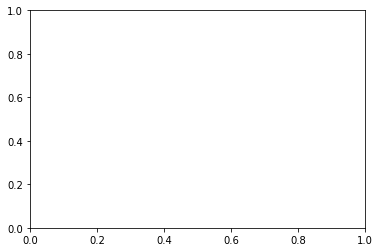

In [138]:
generate_experiment_2_graph("ER Graph", remove_range, 
                            ER_Failure_big_S, ER_Attack_big_S, 
                            ER_Failure_small_s, ER_Attack_small_s)

## 6.6 SF Graph - Run Experiment

Re-set SF_graph and store the size of the system.

In [124]:
SF_graph = create_SF_graph(N, M, seed)

In [125]:
SF_system_size = len(SF_graph)

Run the four experiments, storing all data.

In [126]:
SF_Failure_big_S = generate_failure_big_S(SF_graph, remove_range, SF_system_size)

In [127]:
SF_Attack_big_S = generate_attack_big_S(SF_graph, remove_range, SF_system_size)

In [128]:
SF_Failure_small_s = generate_failure_small_s(SF_graph, remove_range)

In [129]:
SF_Attack_small_s = generate_attack_small_s(SF_graph, remove_range)

Graph the results of the experiment.

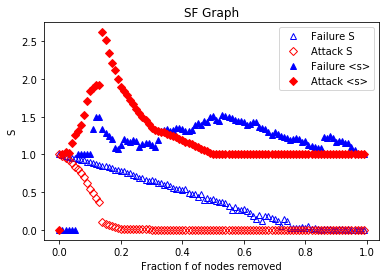

In [130]:
generate_experiment_2_graph("SF Graph", remove_range, SF_Failure_big_S, SF_Attack_big_S, SF_Failure_small_s, SF_Attack_small_s)

## 6.7 Facebook Graph - Run Experiment

Re-set the remove_range which differs to the range used previously. Save the size of the system.

In [131]:
remove_range = list(np.arange(0.0,0.5, 0.01))

In [132]:
facebook_system_size = len(facebook)

Run the four experiments, storing all data.

In [133]:
facebook_Failure_big_S = generate_failure_big_S(facebook, remove_range, facebook_system_size)

In [134]:
facebook_Attack_big_S = generate_attack_big_S(facebook, remove_range, facebook_system_size)

KeyboardInterrupt: 

In [ ]:
facebook_Failure_small_s = generate_failure_small_s(facebook, remove_range)

In [ ]:
facebook_Attack_small_s = generate_attack_small_s(facebook, remove_range)

Graph the results of the experiment.

In [ ]:
generate_experiment_2_graph("Facebook Graph", remove_range, facebook_Failure_big_S, facebook_Attack_big_S, facebook_Failure_small_s, facebook_Attack_small_s)

## 6.8 Discussion On Generated Results

An important result found in these three graphs is the fact that the average size of the isolated clusters (s) peaks and the relative size of the largest cluster (S) crash at the same time. This is because when the relative size of the largest cluster approaches zero, removing further nodes will not detatch nodes from the main cluster (as the 'main cluster' no longer exists!), and so the already isolated clusters start to deteriorate. This is why the average size of the isolated clusters then starts to decrease.

Our results for the ER graph show a vastly different result to that published in the paper. Ideally, our traces for failures and attacks would be almost identical however our failure trace peaks at a lower *s* value, and at a much later stage. This is due to the properties of our graph. In the paper, the traces are the same for failures and attacks, and this means that the graph is more connected. There is no difference in removing the most connected node to removing a random node, and this shows that there are no large nodes substantial enough that they have an effect on the robustness of the whole graph. This phenomenon is due to the fact that the graph has higher connectivity and thus higher clustering and so targeting centralised nodes is not likely to affect the connectivity of the graph any more than a random attack. 

Our results for the scale free graph directly support those found in the paper. The only slight variation is in the smoothness of the traces. This is becuase the paper uses 10 times as many nodes in its scale free graph, and with a larger graph, the removal of a single node will have a smaller proportional effect on the entire graph, which results in the traces being smoother. 

Once again, a way to improve our results for both of these graphs would be to access greater computational power so that the program could implement a dataset with traits more representative of those found in the research paper.

Our implementation with the facebook graph produces results relatively different to the papers results derived from using the internet and world wide web subsets. Firstly, the change in our average isolated cluster size (s) is much larger and peaks after a larger fraction of nodes have been removed. Tis suggests that the facebook dataset has higher connectivity, because a larger fraction of nodes need to be removed before the main cluster completely deteriorates. This makes sense, as the average degree of the facebook dataset (22) is much higher than the datasets used in the paper (3.4 & 4.6), meaning that the facebook dataset is in fact more connected. 

The multiple tiers in our results demonstrates that multiple larger clusters are isolated before the main cluster deteriorates. Larger clusters being isolated means that the average isolated cluster size wiill drastically jump higher, and this pattern is clear in our results. This phenomenon is also partly evident in the paper's results for the world wide web graph, suggesting that the connectivity of the facebook and world wide web might be similarly structured. 

# 7. Extension

## Building Robustness

As this paper has been all about how to test the robustness (how vulnerable the network is to random failure and attack), in the extension we are going to explore how to build a robust network.

## Hub and Spoke Network

The first network we are going to look at is a Hub and Spoke network which connects every node to a central node.

In [ ]:
def create_hub_spoke_graph(N):
    '''
        N : Number of nodes
    '''
    return nx.star_graph(N)

Visulisation

In [ ]:

N = 6
hub_graph = create_hub_spoke_graph(N)
nx.draw(hub_graph, font_size=15, node_color='yellowgreen', node_size=1000)

(REWORD)
This network is robust to random failures as only the central node can break the network. Therefore, the probability that a random failure will fragment the network is 1/N, which is negligible for large N. However, this network is very vulnerable to attacks, as the removal of a single node breaks the network into isolated nodes.

We can increase the robustness of this graph by enhancing it's attack tolerance. We can do this by connecting it's peripheral nodes as shown below.

In [ ]:
def create_connected_hub_spoke_graph(N):
    '''
        N : Number of nodes
    '''
    return nx.wheel_graph(N)

Visulisation

In [ ]:
N = 7

connected_hub_graph = create_connected_hub_spoke_graph(N)
nx.draw(connected_hub_graph, font_size=15, node_color='yellowgreen', node_size=1000)

However this comes at a cost. By doing this we double the amount of links. Let us calculate the average degree for both graphs.

In [ ]:
def find_average_degree(G):
    
    # G.degree returns (node, degree)
    degrees = list(G.degree)
    
    total = 0
    for node, degree in degrees:
        total += degree
        
    return (total, G.number_of_nodes())

# Print out average degree
hub_total_degree, hub_nodes = find_average_degree(hub_graph)
print ("Hub and Spoke average degree = " + str(hub_total_degree) + "/" + str(hub_nodes))
       
conn_total_degree, conn_nodes = find_average_degree(connected_hub_graph)
print ("Connected Hub and Spoke average degree = " + str(conn_total_degree) + "/" + str(conn_nodes))

If we define the cost to build a network to be proportional to its average degree <k>, the cost of the connected hub and spoke (24/7) is double the cost of the hub and spoke (12/7). This increases cost prompts us to refine our question: can we maximise the robustness of a network without changing the cost?

(LOTS OF EXPLANATION)

In [ ]:
def create_centralised_graph(N, k, seed):
    G = nx.watts_strogatz_graph(N, k, 1, seed)
    
    # Calculate kmax (<k> * N) ^ (2/3)
    kmax = int(round(np.power(N*k, (2/3)))) * k
    if kmax >= N-1:
        kmax = N-2
    
    # Find a random subset of all nodes
    node_list = list(G.nodes)
    node_list.pop(0)
    random_subset = random.sample(node_list, kmax)
    
    # Connect the 0th node to all nodes in that random subset.
    for i in random_subset:
        G.add_edge(0, i)
    
    return G

Here we create a centralised graph and display it with 50 nodes and k = 3.

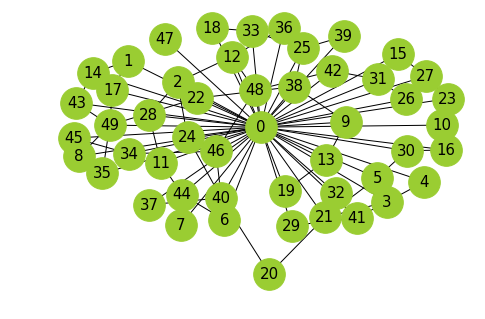

In [144]:
N = 50
k = 3

centralised_graph_2_small = create_centralised_graph(N, k, seed)    
nx.draw(centralised_graph_2_small, font_size=15, with_labels=True, node_color='yellowgreen', node_size=1000)

In [145]:
def generate_robust_graph(name, remove_range, Failure_big_S, Attack_big_S):
    plt.plot(remove_range, Failure_big_S, marker='^', linestyle = 'None', label="Failure", color="b", markerfacecolor='none')
    plt.plot(remove_range, Attack_big_S, marker='D', linestyle = 'None', label="Attack", color="r", markerfacecolor='none')
    plt.xlabel('Fraction f of nodes removed')
    plt.ylabel('S')
    plt.legend(loc='upper right')
    plt.title(name)
    plt.show()

N = 10000, k = 2. Graph.

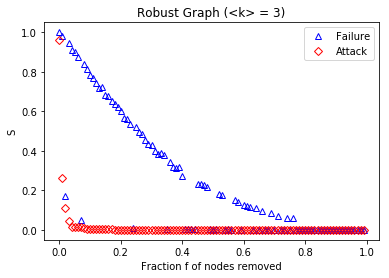

In [147]:
# Set the remove range for all the robust graphs
remove_range = list(np.arange(0.0, 1, 0.01))

# Create the network for graphing
N = 10000
k = 2
network_k_2 = create_centralised_graph(N, k, seed) 

robust_failure_2 = generate_failure_big_S(network_k_2, remove_range, N)
robust_attack_2 = generate_attack_big_S(network_k_2, remove_range, N)

generate_robust_graph("Robust Graph (<k> = 3)", remove_range, robust_failure_2, robust_attack_2)

N = 10000, k = 5

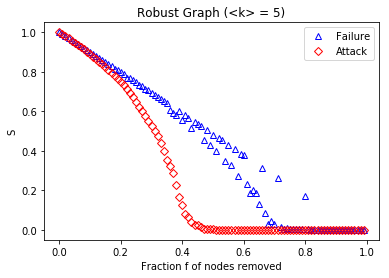

In [149]:
# Create the network for graphing
N = 10000
k = 5
network_k_5 = create_centralised_graph(N, k, seed) 

robust_failure_5 = generate_failure_big_S(network_k_5, remove_range, N)
robust_attack_5 = generate_attack_big_S(network_k_5, remove_range, N)

generate_robust_graph("Robust Graph (<k> = 5)", remove_range, robust_failure_5, robust_attack_5)

N = 10000, k = 7

In [ ]:
# Create the network for graphing
N = 10000
k = 7
network_k_7 = create_centralised_graph(N, k, seed) 

robust_failure_7 = generate_failure_big_S(network_k_7, remove_range, N)
robust_attack_7 = generate_attack_big_S(network_k_7, remove_range, N)

generate_robust_graph("Robust Graph (<k> = 7)", remove_range, robust_failure_7, robust_attack_7)